In [1]:
import tensorflow as tf
from tensorflow.keras import models, layers
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Load CIFAR-10 dataset
(Xtrain, ytrain), (Xtest, ytest) = tf.keras.datasets.cifar10.load_data()

In [3]:
# Flatten labels into a 1D array
ytrain = ytrain.reshape(-1,)
ytest = ytest.reshape(-1,)

# Normalize the images
Xtrain = Xtrain / 255.0
Xtest = Xtest / 255.0

In [4]:
classes = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

In [5]:
# Function to visualize samples
def plot_sample(X, y, index):
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])
    plt.show()

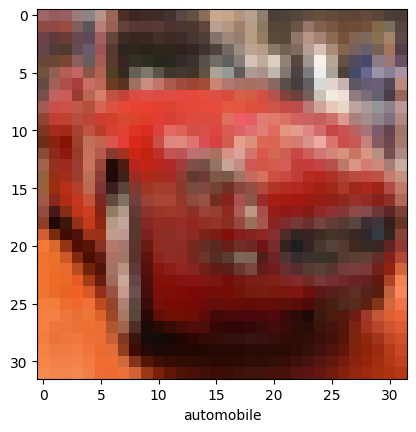

In [6]:
# Visualize a sample image
plot_sample(Xtrain, ytrain, 5)

In [7]:
# Reshape image data into 1D arrays for ANN
Xtrain_flattened = Xtrain.reshape(Xtrain.shape[0], -1)  # (50000, 3072)
Xtest_flattened = Xtest.reshape(Xtest.shape[0], -1)    # (10000, 3072)

In [8]:
# Define the ANN model
ann = models.Sequential([
    layers.Dense(512, activation='relu', input_shape=(3072,)),  # Input layer
    layers.Dense(256, activation='relu'),                      # Hidden layer
    layers.Dense(128, activation='relu'),                      # Hidden layer
    layers.Dense(10, activation='softmax')                     # Output layer for 10 classes
])

c:\Users\nilesh\anaconda3\envs\mllab\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
# Compile the model
ann.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

In [10]:
# Train the model
ann.fit(Xtrain_flattened, ytrain, epochs=15, batch_size=64)

Epoch 1/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 14s 17ms/step - accuracy: 0.2780 - loss: 1.9921
Epoch 2/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 12s 16ms/step - accuracy: 0.3953 - loss: 1.6941
Epoch 3/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 11s 15ms/step - accuracy: 0.4281 - loss: 1.6039
Epoch 4/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 11s 15ms/step - accuracy: 0.4516 - loss: 1.5347
Epoch 5/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 11s 15ms/step - accuracy: 0.4641 - loss: 1.4992
Epoch 6/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 12s 15ms/step - accuracy: 0.4839 - loss: 1.4529
Epoch 7/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 11s 15ms/step - accuracy: 0.4892 - loss: 1.4226
Epoch 8/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 12s 15ms/step - accuracy: 0.4994 - loss: 1.4038
Epoch 9/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 11s 15ms/step - accuracy: 0.5059 - loss: 1.3726
Epoch 10/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 12s 15ms/step - accuracy: 0.5150 - loss: 1.3530
Epoch 11/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 11s 15ms/step - accuracy: 0.5291 - loss: 1.3207
Epoch 12/15
782/782 ━━━━━━━━━━

In [11]:
# Evaluate the model
loss, accuracy = ann.evaluate(Xtest_flattened, ytest)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4977 - loss: 1.4477
Test Loss: 1.460294485092163
Test Accuracy: 0.4902999997138977


In [12]:
# Predict and visualize
ypred = ann.predict(Xtest_flattened)
y_pred_classes = [np.argmax(element) for element in ypred]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


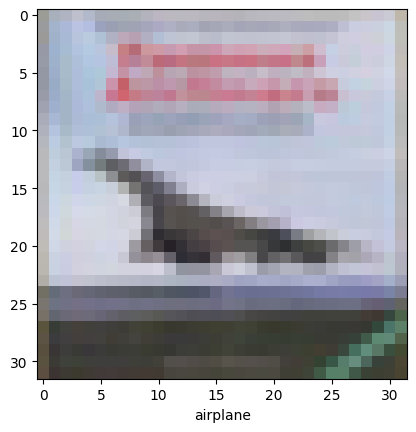

Predicted Label: ship


In [13]:
# Visualize prediction
plot_sample(Xtest, ytest, 3)
print("Predicted Label:", classes[y_pred_classes[3]])

In [14]:
# Save the ANN model
ann.save('ann_cifar10.h5')
print("Model saved as 'ann_cifar10.h5'")

Model saved as 'ann_cifar10.h5'


GUI 

In [15]:
import tkinter as tk
from tkinter import filedialog, Label, Button
from PIL import Image, ImageTk
import numpy as np
import tensorflow as tf

In [16]:
# Load the ANN model
model = tf.keras.models.load_model('ann_cifar10.h5')

# CIFAR-10 class labels
classes = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

In [17]:
# Function to preprocess the image for the ANN model
def preprocess_image(image_path):
    img = Image.open(image_path)
    img = img.resize((32, 32))  # Resize to match CIFAR-10 dimensions
    img = np.array(img)
    img = img / 255.0  # Normalize pixel values to [0, 1]
    img = img.reshape(1, -1)  # Flatten the image to (1, 3072)
    return img

# Function to predict the class of the image
def predict_image(image_path):
    img = preprocess_image(image_path)
    prediction = model.predict(img)  # Get predictions
    class_index = np.argmax(prediction)  # Get the index of the highest probability
    return class_index

# Function to load an image and display the prediction
def load_image():
    file_path = filedialog.askopenfilename()
    if file_path:
        img = Image.open(file_path)
        img = img.resize((128, 128))  # Resize for display in the GUI
        img = ImageTk.PhotoImage(img)
        image_label.config(image=img)
        image_label.image = img  # Store a reference to prevent garbage collection

        # Predict the class of the image
        class_index = predict_image(file_path)
        class_name = classes[class_index]
        result_label.config(text=f"Predicted Class: {class_name}")

In [21]:
# Initialize the Tkinter GUI window
root = tk.Tk()
root.title("CIFAR-10 Image Classifier (ANN)")

# Create and place the GUI elements
load_button = Button(root, text="Load Image", command=load_image)
load_button.pack(pady=10)
image_label = Label(root)
image_label.pack()
result_label = Label(root, text="")
result_label.pack(pady=10)

# Run the Tkinter main event loop
root.mainloop()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
